# Домашне завдання Модуль 4
# Частина друга

Нехай все населення (NN індивідів) ділиться втричі групи: індивіди, які сприйнятливі до цієї хвороби, але здорові (susceptible) — S(t)S(t); заражені індивіди (infected) - I (t) I (t) (вони хворі самі і є носіями хвороби) і здорові індивіди, які мають імунітет до даної хвороби (recovered) - R (t) R (t).

S(t)+I(t)+R(t)=N

Вважаємо, що коли кількість інфікованих перевищує певне фіксоване значення I^*I
∗
 , Швидкість зміни числа сприйнятливих до хвороби індивідів буде пропорційно числу самих сприйнятливих індивідів.

dt / dS =−αS

Тепер, коли кожен сприйнятливий до хвороби індивід зрештою занедужує і стає інфекційним, то швидкість зміни інфікованих індивідів це різниця за одиницю часу між захворілими і тими хто одужує.

dI / dt =αS−βI

Постійні пропорційності α і β називають коефіцієнтами захворюваності та одужання відповідно.

Швидкість зміни числа індивідів, що одужують:

dR / dt = βI

Щоб рішення відповідних рівнянь визначалися однозначно, необхідно задати початкові умови. Приймемо, що:
α=0.5
β=0.3
N = 1000000
S(0) = 990000
I(0) = 7000
R(0) = 3000
t_0, t_f = 0, 25t 

Необхідно виконати:


1) Розв'язати диференціальне рівняння та побудувати графік функції S(t)

In [1]:
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:

alpha = 0.5
beta = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

In [3]:

def dsdt(t, s):
    return -alpha * s

In [4]:

solution_s = solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)
solution_s

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f2fb5cc9970>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

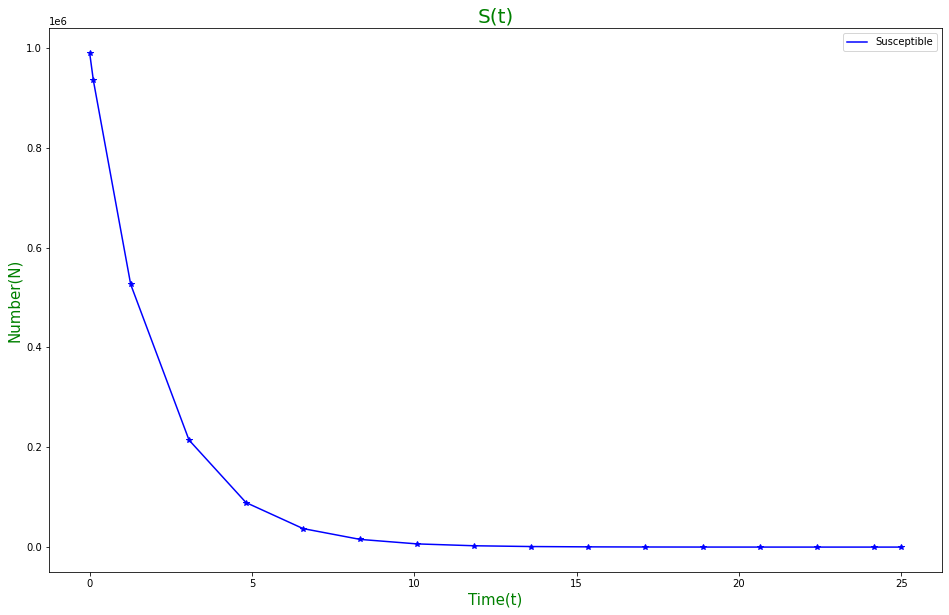

In [5]:

plt.rcParams["figure.figsize"] = (16, 10)
plt.plot(solution_s.t, solution_s.y[0], '*', color='b')
plt.plot(solution_s.t, solution_s.sol(solution_s.t)[0], color='b', label='Susceptible')
plt.title('S(t)', fontsize=20, color='g')
plt.xlabel('Time(t)', fontsize=15, color="g") 
plt.ylabel('Number(N)', fontsize=15, color="g") 
plt.legend()
plt.show()

Розв'язати диференціальне рівняння  та побудувати графік функції I(t)

In [6]:

def didt(t, i):
      return alpha * solution_s.sol(t) - beta * i

In [7]:
solution_i = solve_ivp(didt, (t0, tf), [I0], dense_output=True)
solution_i

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f2fb5cc9160>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08332734, 446699.01195851, 319077.83028019,
        165571.99131376,  71966.74863635,  29712.58392623,
         12130.57394035,   5009.75291414,   2075.26330114,
          1367.85128541]])
 y_events: None

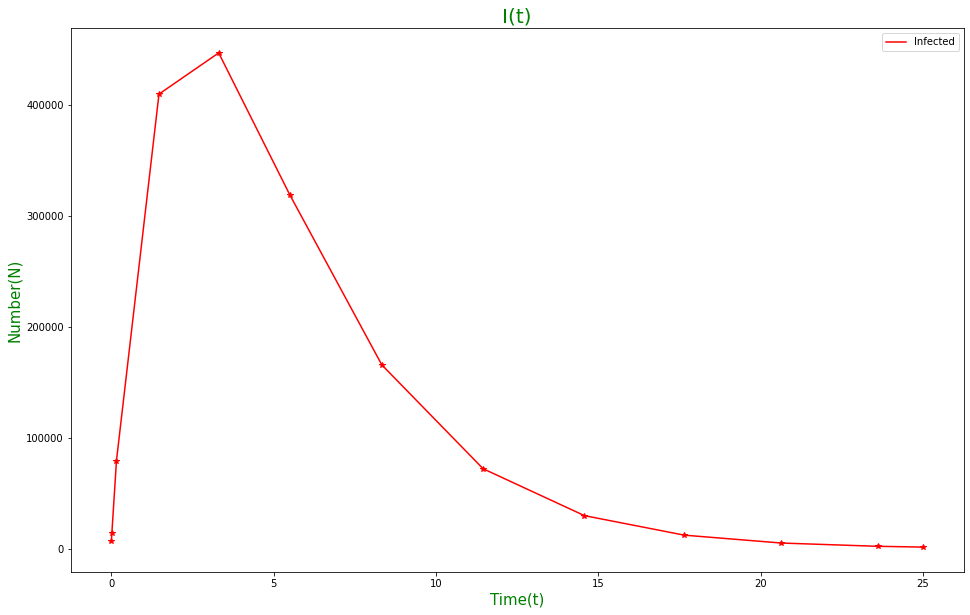

In [8]:

plt.rcParams["figure.figsize"] = (16, 10)
plt.plot(solution_i.t, solution_i.y[0], '*', color='r')
plt.plot(solution_i.t, solution_i.sol(solution_i.t)[0], color='r', label='Infected')
plt.title('I(t)', fontsize=20, color='g')
plt.xlabel('Time(t)', fontsize=15, color="g") 
plt.ylabel('Number(N)', fontsize=15, color="g") 
plt.legend()
plt.show()

Використовуючи рішення рівнянь (2) і (3), за допомогою рівняння (1), знайти рішення рівняння (4) (використовуйте інтерполяцію interp1d) та побудувати графік функції R(t)

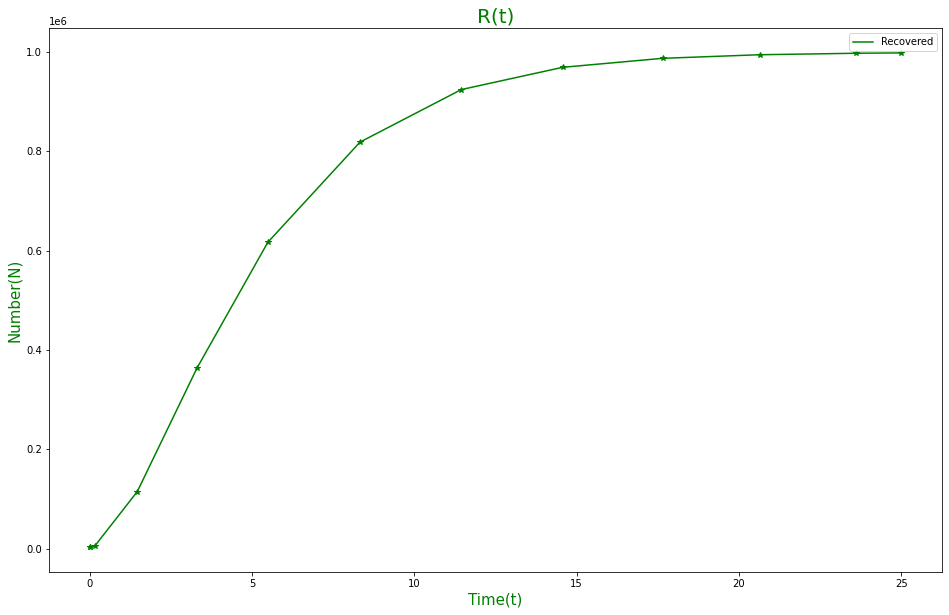

In [9]:

R = N - solution_s.sol(solution_i.t)[0] - solution_i.y[0]
R_interp = interp1d(solution_i.t, R, kind='linear')

plt.plot(solution_i.t, R, '*', color='g')
plt.plot(solution_i.t, R_interp(solution_i.t), color='g', label='Recovered')
plt.title('R(t)', fontsize=20, color='g')
plt.xlabel('Time(t)', fontsize=15, color="g") 
plt.ylabel('Number(N)', fontsize=15, color="g") 
plt.legend()
plt.show()

Побудувати всі три графіки S(t), I(t) та R(t) на одній області відображення

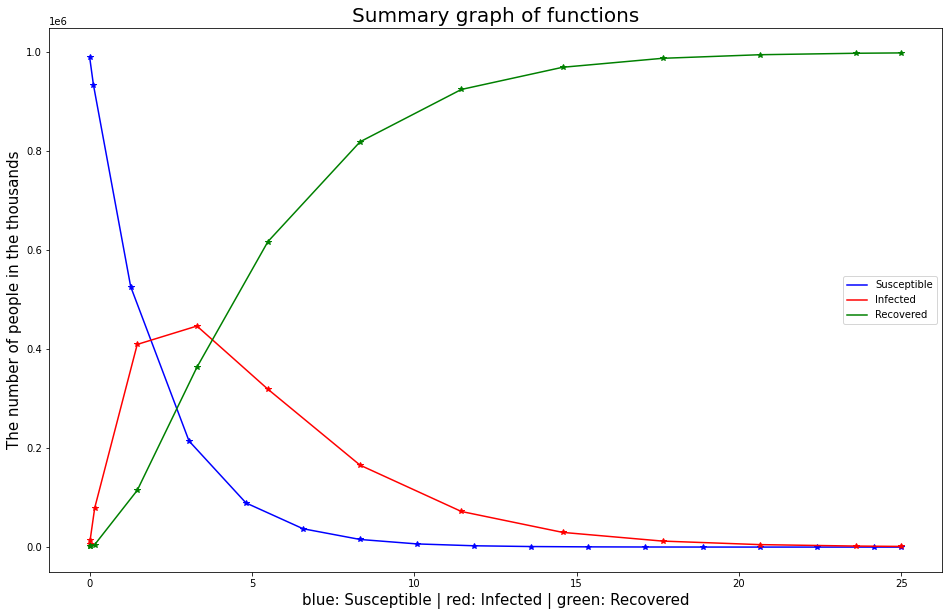

In [10]:
plt.rcParams["figure.figsize"] = (16, 10)

# S - сприйнятливі до цієї хвороби, але здорові (susceptible)
plt.plot(solution_s.t, solution_s.y[0], '*', color='b')
plt.plot(solution_s.t, solution_s.sol(solution_s.t)[0], color='blue', label='Susceptible')

# I - заражені індивіди (infected)
plt.plot(solution_i.t, solution_i.y[0], '*', color='r')
plt.plot(solution_i.t, solution_i.sol(solution_i.t)[0], color='r', label='Infected')

# R - здорові індивіди, які мають імунітет до даної хвороби (recovered)
plt.plot(solution_i.t, R, '*', color='g')
plt.plot(solution_i.t, R_interp(solution_i.t), color='g', label='Recovered')

plt.title('Summary graph of functions', fontsize=20, color='k')
plt.xlabel('blue: Susceptible | red: Infected | green: Recovered', fontsize=15, color="k") 
plt.ylabel('The number of people in the thousands', fontsize=15, color="k") 
plt.legend()
plt.show()